In [267]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from tqdm import tqdm

In [268]:
df = pd.read_pickle("./Outcomes/Min_model.pkl")

In [269]:
df

,Time,Simplices
0,0,"[287, 940, 4]"
1,0,"[772, 748, 476]"
2,0,"[964, 353, 832]"
3,0,"[513, 411, 863]"
4,0,"[500, 101, 946]"
...,...,...
3520,99,"[536, 465, 391, 232, 236, 634, 271, 815, 70, 981]"
3521,99,"[83, 610, 734, 916, 655, 670, 449, 68, 745, 83..."
3522,99,"[410, 623, 607, 293, 372, 821, 242, 553, 610, ..."
3523,99,"[392, 140, 370, 958, 624, 235, 469, 959, 434, ..."


In [270]:
# We truncate the Time column to integer values
df["Time"] = df["Time"].astype(int)

In [271]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [272]:
av_size=df.groupby('Time')['Size'].mean()

In [273]:
av_size=av_size.to_frame().reset_index()

In [274]:
av_size=av_size[av_size['Time']>=1980]

In [275]:
df = df[df["Size"] > 6]
df

,Time,Simplices,Size
17,0,"[21, 87, 599, 207, 480, 175, 668]",7
18,0,"[680, 714, 894, 567, 242, 4, 213, 731]",8
19,0,"[788, 623, 938, 894, 34, 644, 515, 965]",8
20,0,"[637, 153, 692, 827, 380, 512, 633, 978]",8
21,0,"[995, 511, 167, 562, 1, 914, 92, 988]",8
...,...,...,...
3520,99,"[536, 465, 391, 232, 236, 634, 271, 815, 70, 981]",10
3521,99,"[83, 610, 734, 916, 655, 670, 449, 68, 745, 83...",11
3522,99,"[410, 623, 607, 293, 372, 821, 242, 553, 610, ...",11
3523,99,"[392, 140, 370, 958, 624, 235, 469, 959, 434, ...",11


In [276]:
y1 = 0
y2 = 99
size_max = 21
size_min = 6

In [277]:
l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
len(l2)

13

In [278]:
over = np.zeros((len(l1),len(l2)))
inclusion = np.zeros((len(l1),len(l2)))

In [279]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

def inclusion_size(a,b):
    if b.issubset(a):
        return len(b) - len(a)
    elif a.issubset(b):
        return len(b) - len(a)
    else:
        return np.nan

In [283]:
dict_inc = {}
dict_over = {}

ran = range(0,100,2)

for k,y1 in enumerate(ran):
    size_max = 21
    size_min = 5
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in tqdm(enumerate(l1), total = len(l1)):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc[str(y1)] = inclusion
    dict_over[str(y1)] = over

0


100%|██████████| 17/17 [00:00<00:00, 9118.05it/s]


2


100%|██████████| 17/17 [00:00<00:00, 16357.69it/s]


4


100%|██████████| 17/17 [00:00<00:00, 10836.35it/s]


6


100%|██████████| 26/26 [00:00<00:00, 12741.20it/s]


8


100%|██████████| 17/17 [00:00<00:00, 10949.50it/s]


10


100%|██████████| 18/18 [00:00<00:00, 19443.08it/s]


12


100%|██████████| 13/13 [00:00<00:00, 16379.08it/s]


14


100%|██████████| 11/11 [00:00<00:00, 15524.01it/s]


16


100%|██████████| 21/21 [00:00<00:00, 13536.25it/s]


18


100%|██████████| 17/17 [00:00<00:00, 15113.01it/s]


20


100%|██████████| 16/16 [00:00<00:00, 12120.08it/s]


22


100%|██████████| 20/20 [00:00<00:00, 10462.22it/s]


24


100%|██████████| 17/17 [00:00<00:00, 11991.79it/s]


26


100%|██████████| 21/21 [00:00<00:00, 14411.06it/s]


28


100%|██████████| 21/21 [00:00<00:00, 15339.67it/s]


30


100%|██████████| 15/15 [00:00<00:00, 13411.76it/s]


32


100%|██████████| 18/18 [00:00<00:00, 6797.90it/s]


34


100%|██████████| 28/28 [00:00<00:00, 12640.24it/s]


36


100%|██████████| 14/14 [00:00<00:00, 15196.75it/s]


38


100%|██████████| 15/15 [00:00<00:00, 14334.60it/s]


40


100%|██████████| 14/14 [00:00<00:00, 11591.05it/s]


42


100%|██████████| 19/19 [00:00<00:00, 12494.79it/s]


44


100%|██████████| 26/26 [00:00<00:00, 11786.85it/s]


46


100%|██████████| 20/20 [00:00<00:00, 15468.57it/s]


48


100%|██████████| 23/23 [00:00<00:00, 10603.32it/s]


50


100%|██████████| 25/25 [00:00<00:00, 12245.43it/s]


52


100%|██████████| 19/19 [00:00<00:00, 15272.48it/s]


54


100%|██████████| 17/17 [00:00<00:00, 10471.90it/s]


56


100%|██████████| 13/13 [00:00<00:00, 12250.27it/s]


58


100%|██████████| 33/33 [00:00<00:00, 15867.48it/s]


60


100%|██████████| 21/21 [00:00<00:00, 16191.25it/s]


62


100%|██████████| 24/24 [00:00<00:00, 13736.80it/s]


64


100%|██████████| 19/19 [00:00<00:00, 11167.57it/s]


66


100%|██████████| 19/19 [00:00<00:00, 16008.79it/s]


68


100%|██████████| 14/14 [00:00<00:00, 9354.83it/s]


70


100%|██████████| 18/18 [00:00<00:00, 15151.01it/s]


72


100%|██████████| 20/20 [00:00<00:00, 16727.03it/s]


74


100%|██████████| 23/23 [00:00<00:00, 12860.82it/s]


76


100%|██████████| 24/24 [00:00<00:00, 10095.61it/s]


78


100%|██████████| 20/20 [00:00<00:00, 11623.40it/s]


80


100%|██████████| 16/16 [00:00<00:00, 13273.11it/s]


82


100%|██████████| 22/22 [00:00<00:00, 15156.81it/s]


84


100%|██████████| 18/18 [00:00<00:00, 17015.43it/s]


86


100%|██████████| 16/16 [00:00<00:00, 14054.21it/s]


88


100%|██████████| 19/19 [00:00<00:00, 17792.31it/s]


90


100%|██████████| 27/27 [00:00<00:00, 12815.01it/s]


92


100%|██████████| 17/17 [00:00<00:00, 24121.50it/s]


94


100%|██████████| 21/21 [00:00<00:00, 16475.94it/s]


96


100%|██████████| 21/21 [00:00<00:00, 13897.19it/s]


98


100%|██████████| 11/11 [00:00<00:00, 18221.70it/s]


In [286]:
means= np.zeros(len(ran))
stds= np.zeros(len(ran))
for i, y1 in enumerate(ran):    
    df2 = dict_inc[str(y1)].flatten()[~np.isnan(dict_over[str(y1)].flatten())]
    means[i]= df2.mean()
    stds[i]= df2.std()

KeyError: '1950'

In [285]:
from scipy.interpolate import interp1d
from matplotlib.pyplot import errorbar
ran = range(1950,1992,2)
new_x = np.linspace(1950, 2000, 100)  # Adjust the number of points as needed

# Interpolate y-values for new_x
new_y = np.interp(new_x, np.array(ran), stds)
x=np.array(ran)
y=stds

fig, ax = plt.subplots(figsize=(3,3),dpi=300)
ax.scatter(x=x,y=y)

degree = 3  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, degree)
curve_fit = np.poly1d(coefficients)

# Evaluate the curve fit for new_x
new_y = curve_fit(new_x)

# Plot the original scatter plot
ax.scatter(x, y, label='Original Data')


# Plot the curve fit
ax.plot(new_x, new_y, label='Curve Fit')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Standard Deviation')
#plt.title('Std')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show legend
ax.legend()

# Display the plot
plt.show()


#errorbar(x=np.array(range(1980,2016,4)),y=means, yerr=stds)

ValueError: fp and xp are not of the same length.

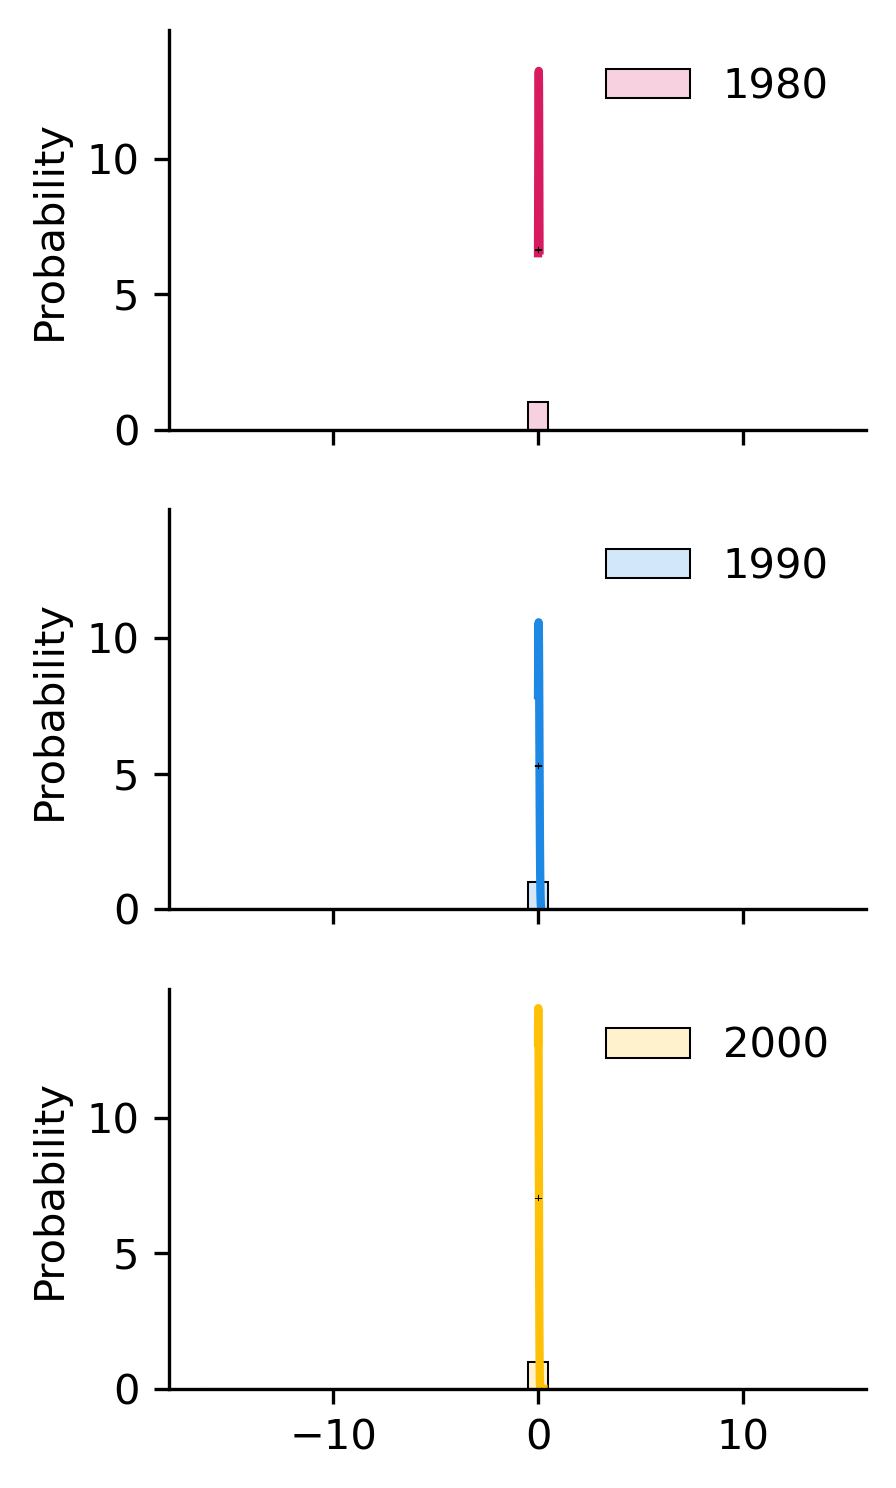

In [ ]:
from scipy.stats import norm

size_max = 21
size_min = 5

palette=['#D81B60','#1E88E5','#FFC107','#004D40','#DF8C17']
fig,ax=plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(3,6),dpi=300,sharey=True)

for i, y1 in enumerate([1980,1990,2000]):
    df1 = dict_inc[str(y1)].flatten()
    df1 = df1[~np.isnan(df1)]
    sns.histplot(df1, bins=np.array(range(size_min - size_max, size_max - size_min)) - 0.5,
                 stat="probability", label=str(y1), color=palette[i], alpha=0.2, ax=ax[i])
     # Fit Gaussian distribution to data
    mu, std = norm.fit(df1)
    x = np.linspace(df1.min(), df1.max(), 10)
    y = norm.pdf(x, mu, std)
    
    # Plot Gaussian curve
    ax[i].plot(x, y, '-', color=palette[i], linewidth=2)
    ax[i].legend(frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    bar_height = max(y)/2
    ax[i].hlines(bar_height, mu - std, mu + std, color='black', linewidth=1.5, linestyle='-')
    ax[i].vlines([mu - std, mu + std], [bar_height-0.03, bar_height-0.03], [bar_height+0.03, bar_height+0.03], color='black', linewidth=1.5)


plt.show()